In [1]:
import sys
sys.path.append('core')

import argparse
import os
import cv2
os.environ['CUDA_VISIBLE_DEVICES']='2'
import glob
import numpy as np
import torch
from PIL import Image

# from raft import RAFT
# from utils import flow_viz
# from utils.utils import InputPadder
from tqdm import tqdm
from matplotlib import pyplot as plt
import mediapy as media

In [2]:
def show(img):
    ''' Image showing function for ipynb '''
    i = img.astype('uint8')*255 if img.dtype == 'bool' else img
    # print(i.dtype, i.ndim)
    plt.figure(figsize=(15, 10))
    if img.ndim == 3:
        # color
        plt.imshow(img[..., ::-1], interpolation='none')
    else:
        plt.imshow(img, cmap='gray', interpolation='none')
        # plt.imshow(img, cmap='gray', vmin=0, vmax=255, interpolation='none')
    plt.show()

In [2]:
DEVICE = 'cuda'

def load_image(imfile):
    img = np.array(Image.open(imfile)).astype(np.uint8)
    print(img.shape)
    img = torch.from_numpy(img).permute(2, 0, 1).float()
    return img[None].to(DEVICE)


def viz(img, flo, filename):
    img = img[0].permute(1,2,0).cpu().numpy()
    flo = flo[0].permute(1,2,0).cpu().numpy()
    
    # map flow to rgb image
    flo = flow_viz.flow_to_image(flo)
    img_flo = np.concatenate([img, flo], axis=0)

    # import matplotlib.pyplot as plt
    # plt.imshow(img_flo / 255.0)
    # plt.show()

    # cv2.imshow('image', img_flo[:, :, [2,1,0]]/255.0)
    # print(img_flo.min(), img_flo.max())
    # cv2.imwrite('result/'+filename, img_flo[:, :, ::-1].astype('uint8'))
    # cv2.waitKey()


def demo(args):
    model = torch.nn.DataParallel(RAFT(args))
    # model = RAFT(args)
    model.load_state_dict(torch.load(args.model))

    model = model.module
    model.to(DEVICE)
    model.eval()

    images = glob.glob(os.path.join(args.path, '*.png')) + \
                glob.glob(os.path.join(args.path, '*.jpg'))
    
    images = sorted(images)
    flows = []
    with torch.no_grad():
        # images = np.random.permutation(images)
        for count, (imfile1, imfile2) in enumerate(tqdm(zip(images[:-1], images[1:]))):
            # print(imfile1.split('/')[-1], imfile2.split('/')[-1])
            # image1 = load_image(imfile1)
            image1 = load_image(images[0])
            image2 = load_image(imfile2)
            # print(image1.shape)

            padder = InputPadder(image1.shape)
            image1, image2 = padder.pad(image1, image2)
            flow_low, flow_up = model(image1, image2, iters=20, test_mode=True)
            # print(image1.shape)
            # print(flow_low.shape, flow_up.shape)
            # print(flow_low.min(), flow_low.max())
            # print(flow_up.min(), flow_up.max())
            # flows.append(flow_up.cpu())
            viz((image1*0.25+image2*0.75), flow_up, f"{count+1}.jpg")
    
    # flow_current = torch.zeros_like(flows[0])
    # image1 = load_image(images[0])
    # for i in range(1, len(images)):
    #     # print(images[i])
    #     image2 = load_image(images[i])
    #     flow_current += flows[i-1]
    #     viz((image1*0.25+image2*0.75), flow_current, f"{i}.jpg")

In [4]:
import shlex
parser = argparse.ArgumentParser()
parser.add_argument('--model', help="restore checkpoint")
parser.add_argument('--path', help="dataset for evaluation")
parser.add_argument('--small', action='store_true', help='use small model')
parser.add_argument('--mixed_precision', action='store_true', help='use mixed precision')
parser.add_argument('--alternate_corr', action='store_true', help='use efficent correlation implementation')
args = parser.parse_args(args=shlex.split('--model=models/raft-things.pth --path=/home/csvt32745/IBRNet/data/nvidia_data_full/Balloon1-2/images_8'))

In [11]:
model = torch.nn.DataParallel(RAFT(args))
# model = RAFT(args)
model.load_state_dict(torch.load(args.model))

model = model.module
model.to(DEVICE)
model.eval()



NameError: name 'RAFT' is not defined

In [7]:
images = glob.glob(os.path.join(args.path, '*.png')) + \
            glob.glob(os.path.join(args.path, '*.jpg'))

images = sorted(images)

In [8]:
flows = []
imgs = []
with torch.no_grad():
    # images = np.random.permutation(images)
    for count, (imfile1, imfile2) in enumerate(tqdm(zip(images[:-1], images[1:]))):
        # print(imfile1.split('/')[-1], imfile2.split('/')[-1])
        # image1 = load_image(imfile1)
        image1 = load_image(imfile1)
        image2 = load_image(imfile2)
        # print(image1.shape)
        if count == 0:
            imgs.append(image1[0].cpu())
        imgs.append(image2[0].cpu())
        
        # padder = InputPadder(image1.shape)
        # image1, image2 = padder.pad(image1, image2)
        # flow_low, flow_up = model(image1, image2, iters=20, test_mode=True)
        # print(image1.shape)
        # print(flow_low.shape, flow_up.shape)
        # print(flow_low.min(), flow_low.max())
        # print(flow_up.min(), flow_up.max())
        # flows.append(flow_up.cpu()[0])
        # viz((image1*0.25+image2*0.75), flow_up, f"{count+1}.jpg")

0it [00:00, ?it/s](128, 240, 3)
23it [00:04,  4.67it/s](128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)
(128, 240, 3)



In [22]:
imgs = [img.transpose([2,0,1]) for img in imgs]
flows = [f.transpose([2,0,1]) for f in flows]

In [23]:
print(imgs[0].shape)
padder.unpad(imgs[0]).shape

(3, 256, 480)


(3, 256, 480)

In [14]:
flows=torch.load('/home/csvt32745/IBRNet/data/nvidia_data_full/Jumping/images_8/optical_flows.pt').numpy()

In [22]:
flow = flows[0].copy()
print(flow.max(), flow.min())
# flow = flow/np.array(flow.shape[1:]).reshape(2, 1, 1)
# print(flow.max(), flow.min())


0.39045045 -0.1158057


In [25]:
imgs = [img.numpy() for img in imgs]
# flows = [f.numpy() for f in flows]

In [28]:
imgs = np.array(imgs).transpose(0, 2, 3, 1)

In [29]:
# media.show_images([flow_viz.flow_to_image(flows[0]), imgs[0]/255.])
# media.show_image(flow_viz.flow_to_image(flows[0]))

NameError: name 'flow_viz' is not defined

In [48]:
shape = imgs[0].shape
ni, nj = np.meshgrid(np.arange(shape[0]), np.arange(shape[1]), sparse=False, indexing='ij')


(256, 480)

In [58]:
cur_flow = np.zeros_like(flows[0])
for i, j in tqdm(zip(ni.flatten(), nj.flatten())):
    dir = cur_flow[i, j]
    ii, jj = i, j
    count = 0
    while count < len(flows):
        flow = flows[count, ii, jj]
        dir = dir + flow
        ii = (flow[0]+ii).astype(int)
        jj = (flow[1]+jj).astype(int)
        if ii < 0 or ii >= shape[0] or jj < 0 or jj >= shape[1]:
            break
        count += 1
    cur_flow[i, j] = dir

122880it [00:22, 5456.77it/s] 


,

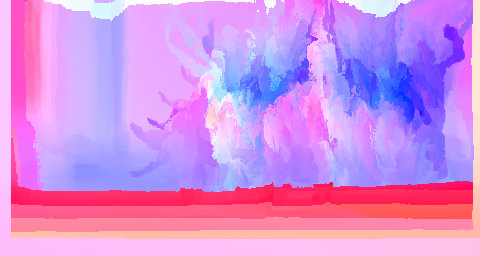
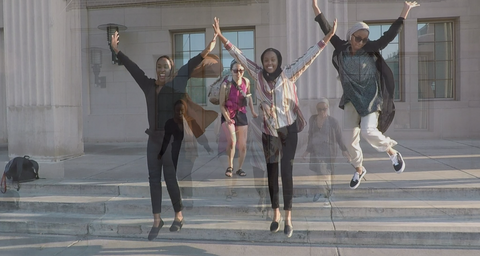

In [60]:
media.show_images([flow_viz.flow_to_image(cur_flow), (imgs[0]*0.25+imgs[-1]*0.75)/255.])

In [5]:
flows = torch.load('/home/csvt32745/IBRNet/data/nvidia_data_full/Balloon1-2/images_8/optical_flows.pt')
print(flows.max(), flows.min())

tensor(0.6897) tensor(-0.7048)


In [8]:
imgs = [cv2.imread(i)[..., ::-1] for i in images]
imgs = torch.from_numpy(np.array(imgs))

In [9]:
from utils.flow_viz import *

tensor([52.6475,  4.5371])


,,

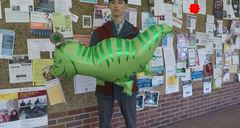
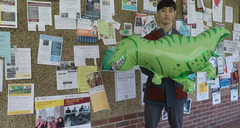
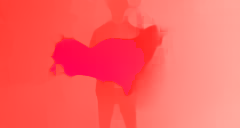

In [225]:
t, s = 4, 12
tar = imgs[t].clone().numpy()
src = imgs[s].clone().numpy()
shape = imgs[0].shape[:2]
y = np.random.choice(np.arange(shape[0]))
x = np.random.choice(np.arange(shape[1]))
f = flows[t, s, y, x]*torch.Tensor(list(shape[::-1]))
f_img = flow_to_image(flows[t, s].numpy())
print(f)
xx = int(x + f[0])
yy = int(y + f[1])
tar = cv2.circle(tar, (x, y), 5, (255, 0, 0), -1)
src = cv2.circle(src, (xx, yy), 5, (255, 0, 0), -1)
media.show_images([tar, src, f_img/255.])